# Database Design using E-R Model

Up till now, we have mostly been given a database scheme and studied how queries, updates, stored procedures, triggers, etc are expressed. In this section, we will learn how to design a database schema. We will focus more on the Entity-Relationship data model (ER) before transforming it into a set of relational schemas.

## Topics
* Design Phases
* E-R Model Concepts
 * Entity or Attribute?
 * Entity or Relationship?
* Mapping Cardinalities
* E-R Model Pictorial Notations
 * Chen Notation
 * Crow's foot
* E-R Diagram
 * Generalization in E-R Diagram
* Converting E-R Diagrams to Relational Schema
---

## Design Phases

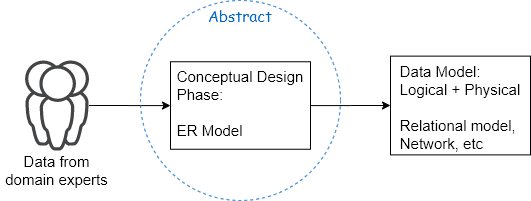

There several steps before we can implement a database physical. These step can be roughly grouped into 3 phases.
1. **Initial Phase** - understanding the needs of your prospective database users. Normally the person designing the database is not familiar with the data therefore they would need to team up with the domain experts to determine the user requirements.

2. **Conceptual Phase** - the database designer will choose an appropriate abstract data model to translate those requirements. The most common model used in this phase is the **Entity-Relationship data model (E-R)**. The purpose of this phase is to specify the entities that are to be represented in the database, the attributes of the entities, the relationships among the entities, and constraints on the entities and relationships. This is typically a graphical representation of the schema.
 
 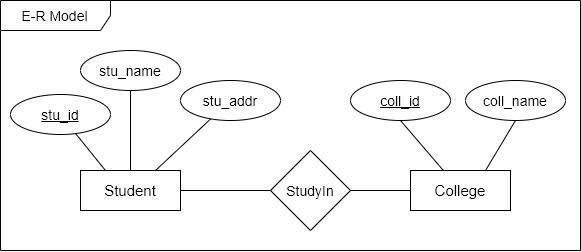

 A fully developed conceptual schema will also include the functional requirements of the organization such as transactions applied on the data, retrieval of specific data, updating and deleting of data.
 
3. **Implementation** - split into 2 parts:
  * **Logical** - the E-R model is mapped onto a relational data model.
    
    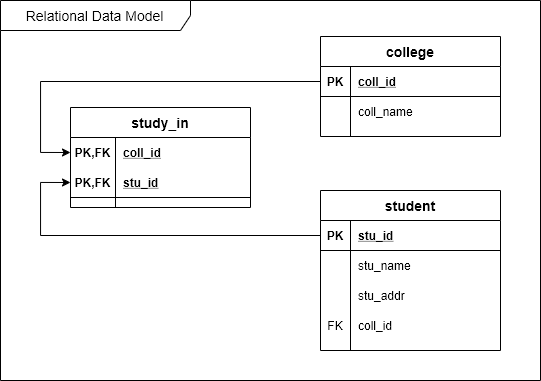
    
  * **Physical** - system-specific database schema with features like forms of file organization or how should the data be indexed

<br>

The 2 major pitfalls of designing a database schema is 
1. **Redundancy** - this means that there is repeated information either due to some paths (E-R Model) or relations (Relational Model).
 
 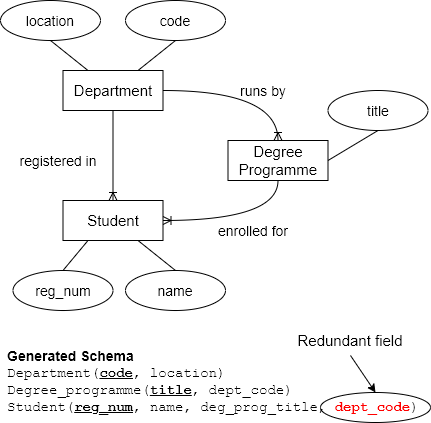
 
 The biggest issue of redundant data is inconsistency as we need to take precautions when updating all copies of the data.

2. **Incompleteness** - when a bad design make certain aspects of the data difficult or impossible to model. For example if we have a `Degree program` without any relation to a `Department`, we cannot represent any new degree programs unless a department sponsors it. A work around would be to use `Null` values but if there is primary key constraints on the attribute, it would fail.

---
## E-R Model Concepts

It is a data model that is used to represent real world data in the form of **entities** and **relationships**. <br>
The E-R model uses 3 concepts: 
* **Entity** - is a "thing" or an "object" in the real world that is distinguishable from all other objects. It can either be a physical (eg, a person, a car) or a conceptual (eg, a company, an event info) existence. An entity always has a set of properties with values to uniquely identify it. For example, a product would have the property `product_id` which would uniquely identify it among all the products of the same type (also called an **entity set**). The **symbol** for Entity is: <br>
 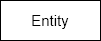
 
* **Attributes** - descriptive properties possessed by each member of an entity set. Each attribute stores similar information concerning each entity in the entity set but each entity may also have its own value for each attribute. The **symbol** for Attribute is :<br>
 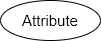

 For example a `product` entity set would have `product_id`, `product_name`, `desc`, `price`, etc. Attribute can also be classified into *simple*, *composite*, *multivalued* and *derived*.
   * **Simple** - attributes that cannot be divided into subparts
   * **Composite** - attributes that can be divided into subparts. For example, the `name` attribute can be divided into `first_name`, `last_name` and `middle_name`.
   * **Multivalued** - attributes that can contain multiple similar values, eg `phone_number`. An entity can have multiple phones thus having multiple phone numbers.
   * **Derived** - values of these type of attributes can be derived from values of other related attributes or entities. For example, `age` can be derived from `date_of_birth`.
   * **Key** - special attribute that is used to identify an object instance.


* **Relationship** - captures how entities are related to one another. Relationships are usually verbs such as assign, associate, or track and provide useful information that could not be easily found out by just the entity types. The **symbol** for Relationship is :<br>
 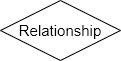
 
 The association between entity sets is referred to as *participation*, that means an entity set **participate** in the relationship set R. The purpose of the entity set in a relationship is called the entity's **role**. When an entity set can participates in a relationship set more than once but with different roles, it is called a **recursive** relationship.<br>
 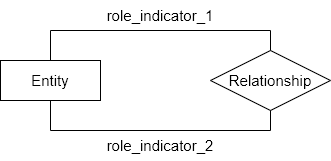
 
 Recursive relationships are part of the type of relationships called **Unary/Binary** relationships, meaning that 1 relationship set involves 2 entity sets (this is the most common type in database systems).<br>
 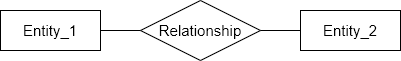
 
 The number of entity sets that participate in a relationship set is called **degree of the relationship set**. From the above figure, a unary/binary relationship set has a degree of 2 and **ternary** relationship set is of degree 3. <br>
 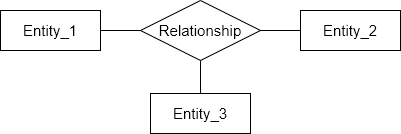
 
 Relationships can also have attributes, they are called **descriptive attributes**. These attributes gives additional information about the relationship. For example, take the figure below. The `duration` attribute add more information to the relationship set thus the relationship set can be read as "how long has an employee worked for the firm". <br>
 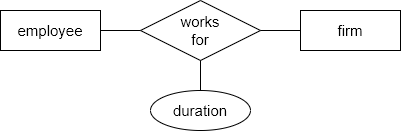

### Entity or Attribute?

Sometimes we will encounter cases where we wonder if an item should be an attribute or an entity. For example, `email` can either be both entity (storing of multiple emails) and attribute (email of a person) but it depends on the context that it is being used. The following questions are "rules of thumb" to help you decide if an item should be an entity or an attribute.
* Is the item of direct interest to the database? <br>
  
  Objects of **direct interest** should be entities and information that **describes them** should be stored in attributes. For example, if we have a database for inventory and sales, interest should be centered about the customers and not their email addresses therefore the email address would be best modeled as an attribute of the `customer` entity.
  
* Does the item have components of its own? <br>
  
  If yes, we must find a way of representing these components. A separate entity might be the best solution. For example, if we have a table that stores the student grades along with the course name, year, and semester for each course that a student takes. It would be better to separate the detailed course information from the student table into a `course` entity and just use a `course_id` number to identify the course taken by the student.

* Can the object have multiple instances? <br>
  
  If yes, we must find a way to store each instance separately. The cleanest way to do this is to represent the object as a separate entity. Going back to the database for inventory and sales, customers can have more than one email address. If they do have more than one, the email address should be modeled as a separate entity.
  
* Is the object often nonexistent or unknown? <br>

  If yes, it is effectively an attribute of only some of the entities, and it would be better to model it as a separate entity rather than as an attribute that is often empty. This can be seen often in attributes such as `grades`. Grades are normally represented as letters and given only after certain conditions have been met. An example are student grades, instead of storing the grades of every course in the `student` entity, it can be better represented as a separated entity or an attribute in another entity.
  
### Entity or Relationship?

An easy way to decide whether an object should be an entity or a relationship is to map the **nouns to entities** and to map the **verbs to the relationships**. For example, in the statement, "A degree program is made up of one or more courses", we can identify the entities as `program` & `course` and the relationship as `is made up of`. Similarly, in the statement, "A student enrolls in one program", the entities are `student` & `program` and the relationship is `enrolls in`. 

We can definitely choose different terms for entities and relationships other than those that appear in the relationships but it is better to keep it simple so that it can be easily checked against the user's requirements. Avoid introducing trivial entities where possible, trivial entities are entities that can be modeled as a relationship between 2 entities.

---
## Mapping Cardinalities

Cardinality is the measure of the number of entities to which another entity can be associated with via a relationship set (aka **degree of relationship**). Most of the time, we use it to describing binary relationship sets but it can also be used to describe relationship sets of more than 2 entity sets. 

For the following explanation, we will use *R* to denote the a binary relationship set between entity sets *A* & *B*. To map cardinalities means one of the following:

* **One-to-One** - Each entity in *A* is associated with at most one entity in *B* and each entity in *B* is associated with at most one entity in *A*. <br>**Shorthand term: 1:1**

  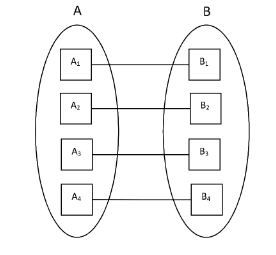
  
  **Example**: Each electronic product has a unique serial number.

* **One-to-Many** - Each entity in *A* is associated with any number (zero or more) of entities in *B*. Each entity in *B*, however, can be associated with at most one entity in *A*. **Shorthand term: 1:m**
  
  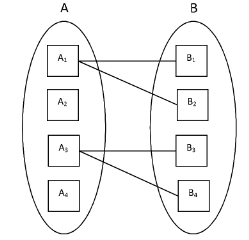
  
  **Example**: 1 person can have several credit cards but each credit card belongs to just 1 person.
  
* **Many-to-One** - Each entity in *A* is associated with at most one entity in *B*. However, each entity in *B* can be associated with any number (zero or more) of entities in *A*. **Shorthand term: m:1**
  
  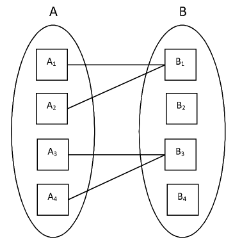
  
  **Example**: Many credit cards belongs to just 1 person.
  
* **Many-to-Many** - Each entity in *A* is associated with any number (zero or more) of entities in *B* and each entity in *B* is associated with any number (zero or more) of entities in *A*. **Shorthand term: m:n**
  
  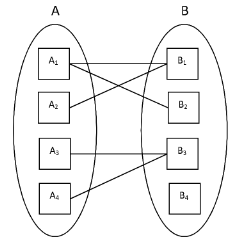
  
  **Example**: Each customer can buy any number of product, and each product can be bought by any number of customers.

**How do we recognize cardinalities in an existing database?**

Let's go back to the University Schema (this is a relational schema done after the E-R Model). <br>
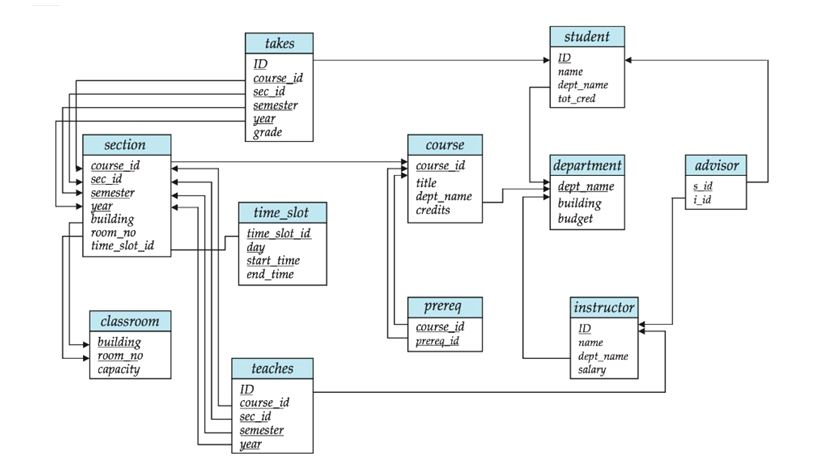

**1:m relationship** <br>
Zoom in on the `student`, `advisor` and `instructor` tables, in particular the `advisor` table. If we were to place that in E-R model terms, we can say that each student can have 1 advisor and each advisor can be in-charged of many students, this is defined as a **1:m relationship** and the data in the `advisor` table reflects as such.

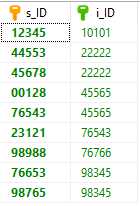

Earlier we learnt about the association between entity sets and relationships is referred to as participation, now we introduce 2 more more concepts related to this theory. The participation of an entity set *E* in a relationship set *R* is said to be **total** if every entity in E must participate in at least one relationship in *R*. However, if there are some entities in *E* that do not participate in relationships in *R*, the participation of entity set *E* in relationship *R* is said to be **partial**.

Going back to our `student`, `advisor` and `instructor` tables, because every student is related to at least 1 instructor through the `advisor` relationship, this relationship is referred to as total but because not every instructor is an advisor to a student, the relationship is partial. When translated into relational database, a **total participation** would have the constraint `NOT NULL` on the attributes and a **partial participation** would allow `NULL` values in the attributes.

**m:m relationship** <br>
The other relationship that can be seen from this database is the **m:n relationship**. This can be seen in the `takes` table where there is a relationship between the `student`, `takes` & `section` tables. If we were to place that in E-R model terms, we can say that each student can take many courses and several courses is held in the same semester.

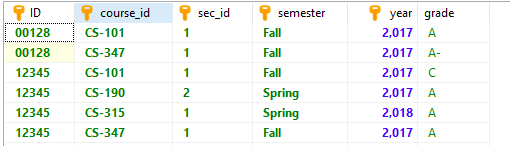

<br>

Relational databases uses the notation of a key to identify unique relationships. The combination of attributes that make up a superkey or a candidate key and primary key are used to distinguish the different entities in the entity set. The rule of thumb to choose a primary key for a binary relationship set depends on the mapping cardinality of the relationship set.

For **many-to-many** relationships, the union of the entity's primary keys will make a minimal superkey and be chosen as the primary key. Let's take a look at the entities `student` & `section` and the relationship set `takes`. According to the definition, the relationship set `takes` will have a superkey consisting of both the primary keys of the `student` and `section` entities.

For **one-to-many** and **many-to-one** relationships, the primary key of the "many" side is a minimal superkey and is used as the primary key. This can be seen in the entities `student` & `instructor` and `advisor` relationship set. We can deduce 2 scenarios from this relationship:
1. if 1 instructor can advise many students, the "many" side is the student and thus the primary key for the `advisor` is the primary key of the `student` entity
2. if an instructor can advise only 1 student, the "many" side is the instructor and thus the primary key for the `advisor` is the primary key of the `instructor` entity

For **one-to-one** relationships, the primary key of either one of the participating entity sets forms a minimal superkey and either one can be chosen as the primary key of the relationship set.

For **non-binary** relationships, if **no cardinality constraints are present** then the superkey formed is only the candidate key and that is chosen to be the primary key.

This is not an exhaustive list of theories about E-R models therefore if you would like to read more about it, you can search up keywords such as "weak/strong entity", "associative entity", "weak (identifying) relationship", "weak attribute".

---
## E-R Model Pictorial Notations

There are several notations used to produce an E-R model. The 2 main ones are the **Chen Notation** & the **Crow's foot**. We will concentrate on the Chen Notation before we see how the same notations are represented using the Crow's foot notation after we learn how to draw an E-R diagram.

### Chen Notation
We have already seen a small part of this notation in the section on *E-R Model Concepts*. Let's recap and add more to it.

| Entities | Attributes | Relationships |
|:---|:---|:---|
| 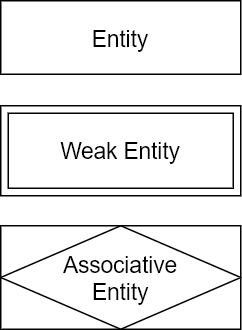 | 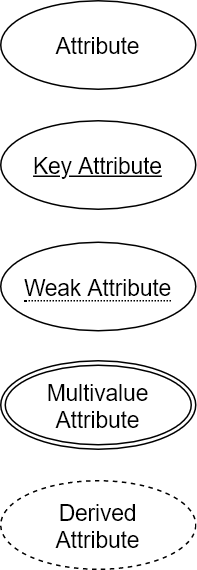 | 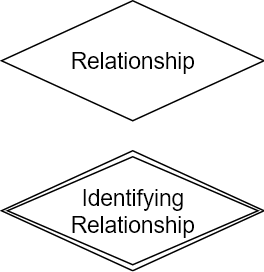 |

Attributes are linked to entities by **straight lines**. In the figure below, the `address` attribute is called a **composite attribute** because it can be subdivided into more attributes.

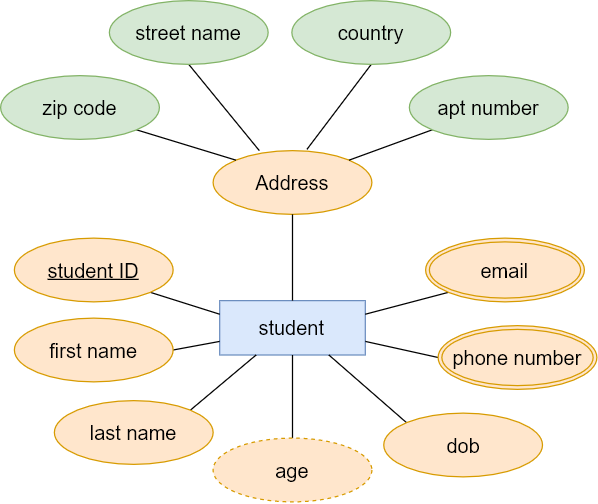

Relationships, as we saw from the table are diamond shaped with the relationship name in it but relationships between entities, attributes and diamond shaped relationships are denoted by a **solid line** for mandatory or a **dashed line** for an optional relationship.

**Cardinality**<br>
Meaning the **degree of relationship** has the shorthand notation of `1:1`, `1:m` or `m:1` and `m:n` is represented as follows:

* **One-to-One (1:1)**

  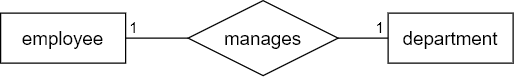


* **One-to-Many (m:1)** <br>
 
  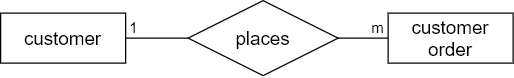


* **Many-to-One (1:m)**<br>
  
  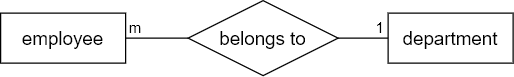
  
* **Many-to-Many (m:n)**<br>
  
  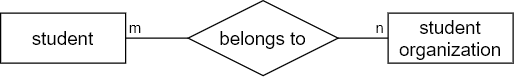
  
* **Other forms to represent cardinality**<br>
  
  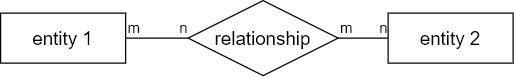
  
  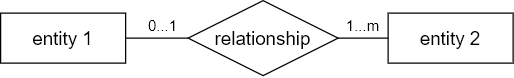


**Participation**<br>
* **Total participation** - where every entity in the set is involved in the relationship
* **Partial participation** - where not all entities in the set are involved in the relationship

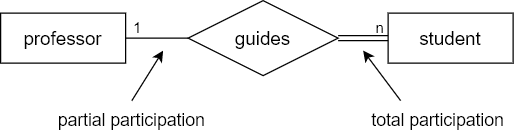

---
## E-R Diagram

Now that we have gone through all the parts, let,s bring it together to see how an E-R diagram is made.

### Scenario 1: A person going to a library to borrow a book.

**Step 1**: Identify the entities. In this case we have 3 entities: `person`, `book`, `shelf`

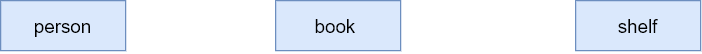

**Step 2**: Identify the relationships between the selected entities:
 * a `person` can borrow a `book`
 * a `book` is placed on a `shelf`

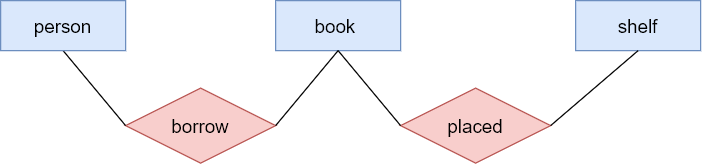

**Step 3**: Identifying the cardinalities:
 * a `person` can borrow 1 or more `book`s and vice versa
 * 1 or more `book`s can be placed on 1 `shelf`s

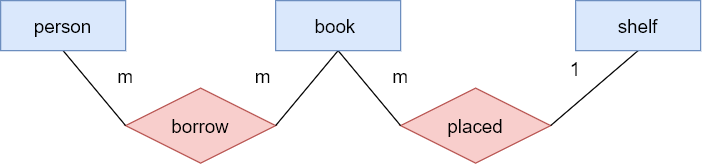

**Step 4:** Identify the entity attributes, including the primary keys:

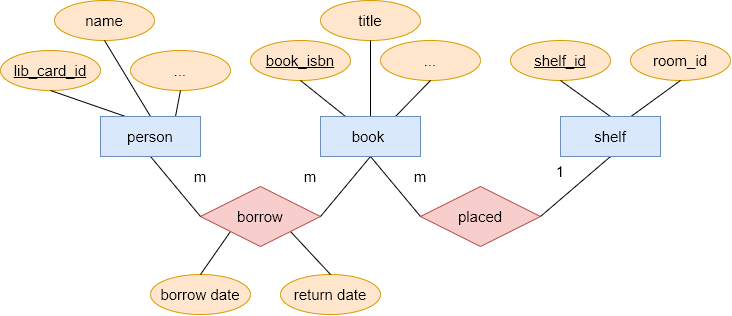

A textual relational schema for that E-R model would be: <br>
**person(<u>lib_card_id</u>, name, ...)** <br>
**book(<u>book_isbn</u>, title, shelf_id ...)** <br>
**borrow(lib_card_id, book_isbn, borrow_date, return_date)** <br>
**shelf(<u>shelf_id</u>, room_id)**

### Scenario 2: Bank Management System
In this scenario, we are going to be looking at a small banking system where Banks have branches & customers, customers have accounts with the banks and customers can choose to take up loans with the bank.

**Step 1:** Identify the entities. In this case we have 5 entities: `bank`, `branch`, `customer`, `loan` & `account`

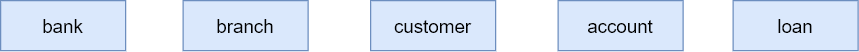

**Step 2:** Identify the relationships between the selected entities:
* banks can have branches
* branches can offer loans
* branches can also maintain accounts
* customers can take up loans
* customers must have an account with the bank/branch to use its services

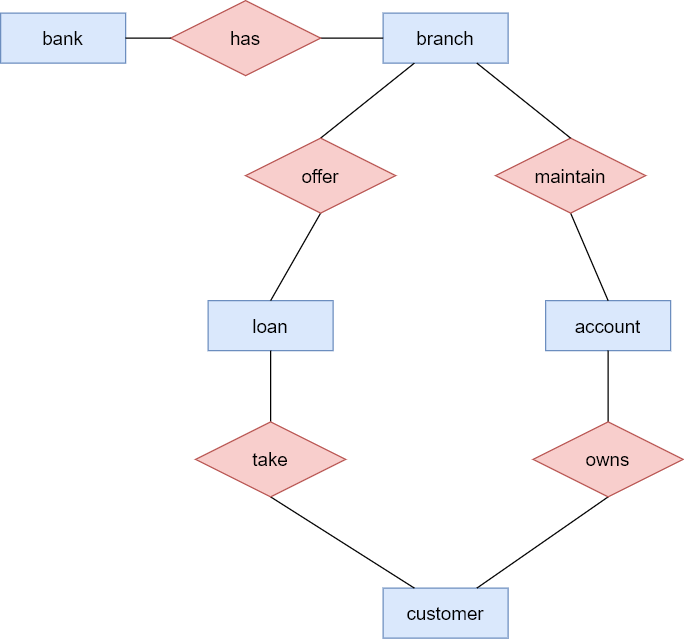

**Step 3**: Identifying the cardinalities:
* banks can have multiple branches & branches can only belong to 1 bank
* branches can offer many types of loans but each loan can only belong to one branch
* branches can also maintain many accounts but each account can only belong to one branch
* customers can take up multiple types of loans & each type of loan can have multiple customers taking it
* customers can have more than 1 account & 1 account can be held by more than 1 customer

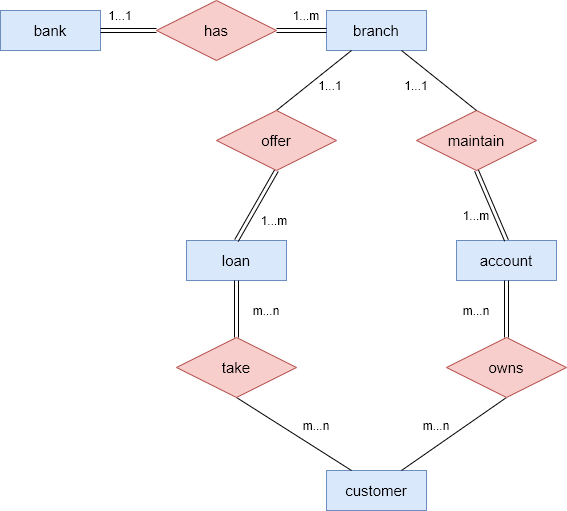

**Step 4:** Identify the entity attributes, including the primary keys:

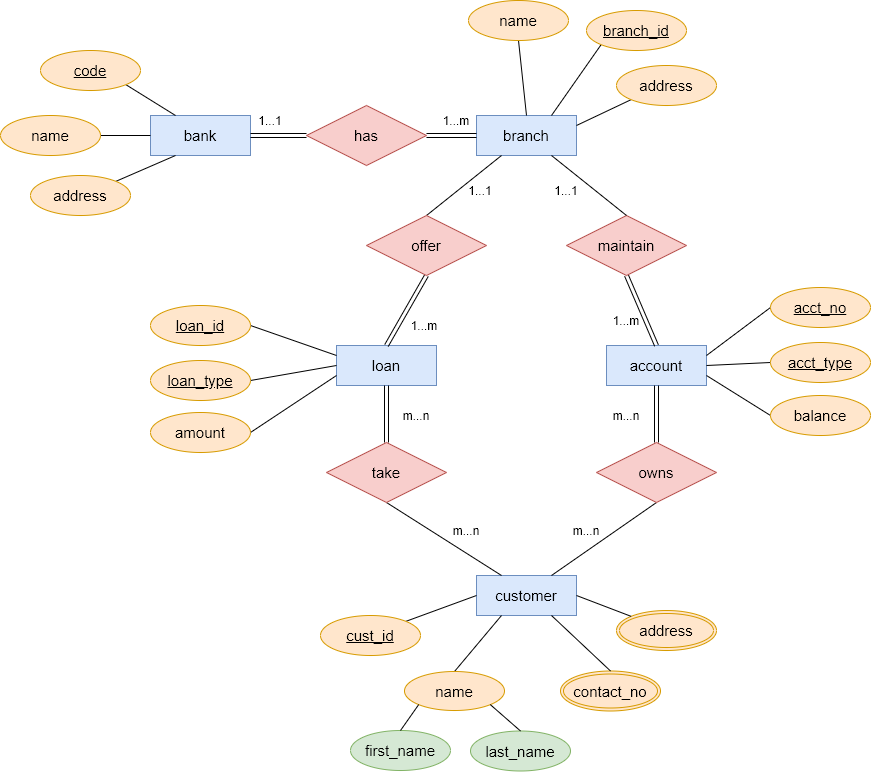

A textual relational schema for that E-R model would be: <br>
**bank(<u>code</u>, name, address)** <br>
**branch(<u>bank_code</u>, <u>branch_id</u>, name, address)** <br>
**loan(<u>loan_id</u>, <u>loan_type</u>, amount, branch_id)** <br>
**account(<u>acct_no</u>, <u>acct_type</u>, balance, branch_id)** <br>
**take(loan_id, loan_type, cust_id, ...)** <br>
**owns(acct_no, acct_type, cust_id, ...)** <br>
**customer(<u>cust_id</u>, first_name, last_name)** <br>
**custAddr(cust_id, address, ...)** <br>
**custContactNo(cust_id, contact_no, ...)** <br>

### Generalization in E-R model

This is the process of extracting common properties from a set of entities to create a generalized entity from it. It uses a bottom up approach where two or more entities can be generalized to a higher level entity if they have some attributes in common. The Chen notation for generalization is a triangle pointing downwards with the words `IS A` in it. For example, a `student` is a generalized entity of an undergraduate and a Master's student.

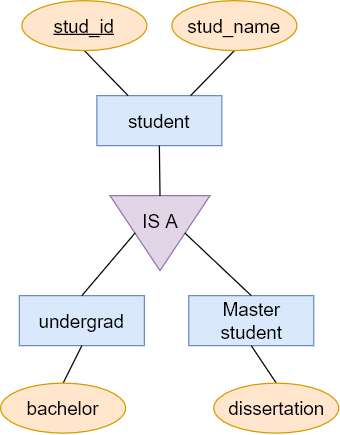

**Note** that generalization has many different representations even in Chen notation, some people will use a diamond whereas others uses a triangle pointing up but all notations has the words `IS A` in it to denote generalization.

### Crow's feet

Another popular notation for E-R diagram is the Crow's feet notation. 

| Entity + Attributes | Relationship + Cardinalities |
|:---|:---|
| 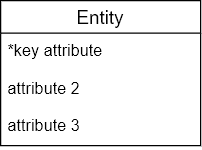 | 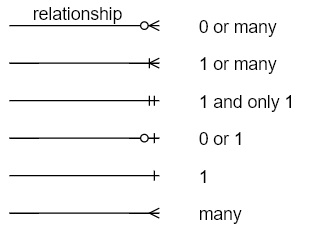 |

**Note** that there are several ways relationships can be represented in Crow's Feet Notation either as words placed on/below/between the lines or in a diamond between the lines. Mandatory relationships denoted by a **solid line** and a **dashed line** for an optional relationships.

**Example 1: Converting Scenario 1 to Crow's Feet Notation**

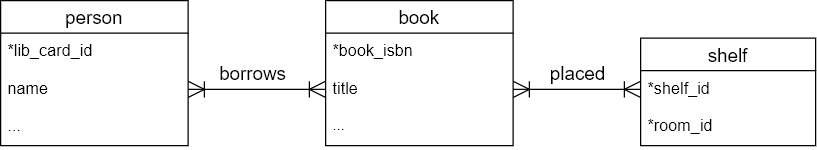

**Example 2: Generalization with Crow's Feet Notation**

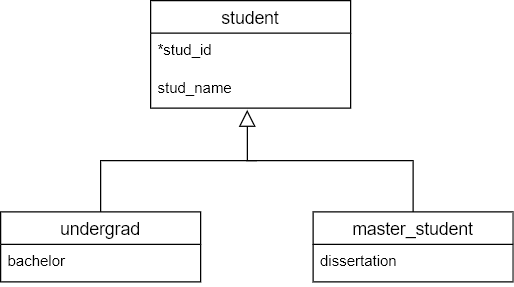

---
## Converting E-R Diagrams to Relational Schema

After drawing the E-R diagram, the next step is to convert it to a relational schema.

### Entity Set

Consider the entity set below

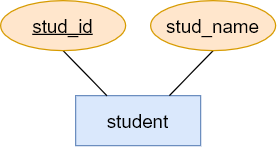

Mapping an entity set to a relational schema is:
1. Entity name is mapped as a **table**
2. Attributes are mapped as **attributes for that table**
3. Key attributes are mapped as **Primary key for that table**

A textual relational schema for that E-R model would be: <br>
**student(<u>stud_id</u>, stud_name)**

### Entity Set with multivalue and/or composite attributes

Consider the entity set below

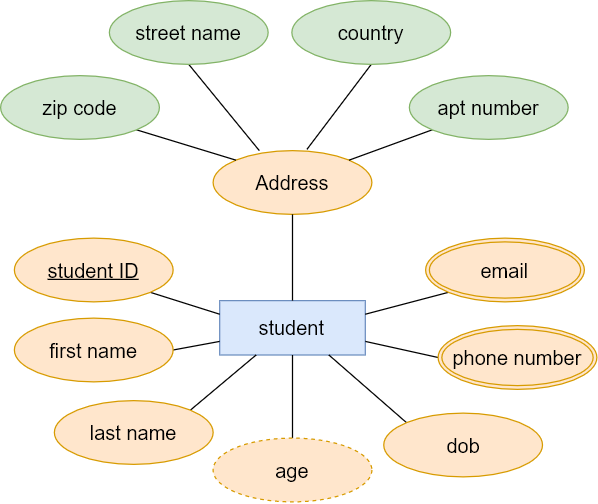

Mapping a multivalue attribute to a relational schema is:
1. **Separate table** is created for the multivalue attribute
2. The key attribute of the table (of the multivalue attribute) and the multivalue attribute makes up the **primary keys** of the new table

Mapping a composite attribute to a relational schema is:
1. the attributes of that made up the composite attributes are madded as **normal attributes** for that table

A textual relational schema for that E-R model would be: <br>
**student(<u>student_id</u>, first_name, last_name, dob, apt_number, country, street_name, zip_code)** <br>
**studentEmail(<u>student_id</u>, <u>email</u>)** <br>
**studentContact(<u>student_id</u>, <u>phone_number</u>)** <br>

### One-to-One (1..1) Relationship

Mapping a one-to-one relationship to a relational schema is:
1. Create a **separate table** for each participating entity sets
2. Primary key of one of the tables can act as the foreign key for the other table

**Example 1:**

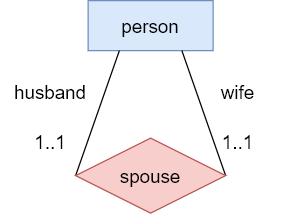

A textual relational schema for that E-R model would be: <br>
**person(<u>person_id</u>, ...)** <br>
**spouse(husband_id, wife_id)** where `husband_id` & `wife_id` are foreign key linking to the person's `person_id`

<br>

**Example 2:**

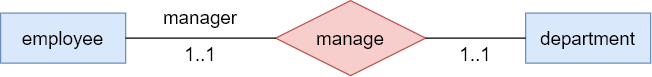

A textual relational schema for that E-R model would be: <br>
**employee(<u>e_id</u>, ...)** <br>
**department(<u>d_id</u>, ..., manager_id)** where `manager_id` is foreign key linking to the employee's `e_id`

### One-to-Many (1..m) Relationship

Mapping a one-to-many relationship to a relational schema is:
1. Create a **separate table** for each participating entity sets
2. Key attribute of the one side is mapped as a foreign key on the many's side table
3. All attributes of the relationship set are mapped as the attributes for the one's side table

**Example 1:**

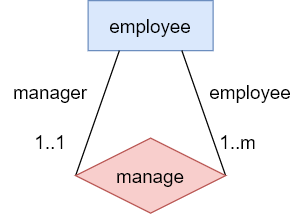

A textual relational schema for that E-R model would be: <br>
**employee(<u>e_id</u>, ..., manager_eid)**

<br>

**Example 2:**

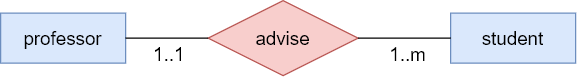

A textual relational schema for that E-R model would be: <br>
**professor(<u>p_id</u>, ...)** <br>
**student(<u>s_id</u>, ..., p_id)**

### Many-to-Many (m..n) Relationship

Mapping a many-to-many relationship to a relational schema is:
1. Relationship set is mapped as a separate table
2. Key attributes of participating entity sets are mapped as primary key for the relationship set table
3. Attributes of relationship set becomes simple attributes for the relationship set table
4. Separate tables are created for other participating entities

**Example:**

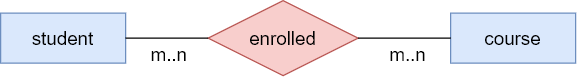

A textual relational schema for that E-R model would be: <br>
**student(<u>s_id</u>, ...)** <br>
**course(<u>c_id</u>, ...)** <br>
**enroll(<u>s_id</u>, <u>c_id</u>, ...)** <br>

### Generalization Model

There's 2 ways to map generalization to relational schema.

**Method 1:**
1. Create a table for each lower-level (child) entity set
2. Attributes of the higher-level (parent) entity set are added to the attributes of the lower-level (child) entity set

**Method 2:**
1. Create tables for each entity set regardless of higher-level (parent) or lower-level (child)
2. Add primary key attributes of the higher-level (parent) entity set to the attributes of the lower-level (child) entity set

**Example:**

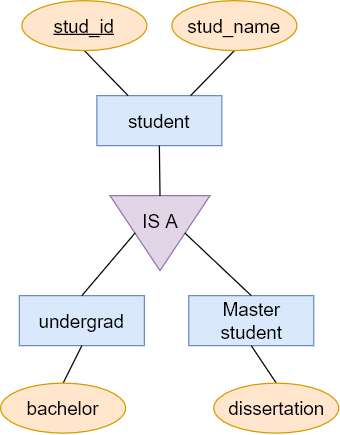

A textual relational schema for that E-R model using **method 1**: <br>
**undergrad(<u>stud_id</u>, stud_name, bachelor, ...)** <br>
**masterStudent(<u>stud_id</u>, stud_name, dissertation, ...)** <br>

A textual relational schema for that E-R model using **method 2**: <br>
**student(<u>stud_id</u>, stud_name, ...)** <br>
**undergrad(<u>stud_id</u>, bachelor, ...)** <br>
**masterStudent(<u>stud_id</u>, dissertation, ...)** <br>

---
## Summary
* brief overview of the 3 design phases and their parts
* 3 concepts of E-R Model 
 * some "rules of thumb" to help decide how to choose between Entity or Attribute & Entity or Relationship
* Mapping Cardinalities
 * learnt what are cardinalities (pertaining to relational data models)
 * how they are mapped 
 * how they can be seen in relational databases
 * how to decide which keys to use based on the type of relationship
* E-R Model Pictorial Notations
 * Chen Notation
 * Crow's Feet Notation
* learnt how to construct an E-R diagram based on scenarios
* what is generalization in E-R diagram
* learnt how to convert E-R diagrams to Relational schemas